# Confusion Matrices

<span>Confusion matrices are commonly used in most classifications problems. I used constantly in a recent fraud detection challenge to see the potential trade-off between my False Positives and False Negatives. The template code I started off with was from Sklearn's documentation page. I have taken this code and modified it to my liking to be a bit more descriptive about the model's performance. Take a look a the original code at the link below or use my modified function for your tasks. Otherwise, take a look at the confusion matrix's functions' documentation below. I plot the results of two models with it.</span>

Sklearn documentation: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

Matplotlib Color Maps: https://matplotlib.org/tutorials/colors/colormaps.html

### Import Preliminaries

In [1]:
# Import Modulse 
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import plottting functions
from matplotlib import rcParams, gridspec

# Import preprocessing functions
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import confusion_matrix

# Import sklearn models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

# Plotting Configuration
rcParams['figure.figsize'] = (30.0, 10.0)
rcParams.update({'font.size': 20})
colors = ['#74a9cf', '#6a51a3']

### Import Data

In [2]:
# Import dataset
kdddf = pd.read_csv('Data/KDD/kddcup.data')

# Append dataframe to a list
dfs = [kdddf]

# Lower columns names in dataframes
for df in dfs:
    df.columns = df.columns.str.lower()
    if df.columns.contains('class') == True:
        df.columns = df.columns.str.replace('class', 'target')
        
# Change target column names
kdddf = kdddf.rename(columns={'normal.':'target'})

### Data Preprocessing

##### Encoding the Data

In [3]:
# Encode target value to 0 and 1 
kdddf.target = [0 if i == 'normal.' else 1 for i in kdddf.target]

# drop feature that contains not data
kdddf.drop(['0.13'], axis=1,inplace=True)

# Encode all object colunms to categorical codes
for col in kdddf.select_dtypes('object'): #
    kdddf[col] = kdddf[col].astype('category').cat.codes

##### Sub Sampling and Preprocessing the Data

In [4]:
# Define working directory
wdf = kdddf
working_file_name = 'kdd'.lower() #synthetics, kdd, credit_card
print(f'Dataset: {working_file_name}')

# define the classes for the confusion matrix
classes = list(np.unique(wdf['target'].values))

# Encode value to numpy
X = wdf.drop('target',axis=1).values
y = wdf['target'].values

# Conduct a train-test-split on the data
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.25)

# Compute the sample weights of the dataset
weights = compute_sample_weight(class_weight='balanced', y=train_y)

# Compuete the number of PCA comentents we are goint to use
components = round(train_x.shape[1]/1.5)

# Saving a backup copy the original data
train_x_norm, train_y_norm = train_x.copy(), train_y.copy()
test_x_norm, test_y_norm = test_x.copy(), test_y.copy()

# Print preprocessing title
print('='*10,'Preprocessing','='*10,'\n')

if working_file_name != 'credit_card':
# Transform the data using PCA
    pca = PCA(n_components=components)
    train_x = pca.fit_transform(train_x)
    test_x = pca.transform(test_x)
    print(f'PCA Components: {components}')
else:
    print('No PCA Used')

# Transform the data using a standard scaler
scaler = StandardScaler(copy=True)
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)
print(f'Standard Scaler: Yes')

# Print data shape title
print('\n'+'='*10,'Data Shape','='*10,'\n')

# Printing metrics around the shape of the datframe

print(f'\nDataFrame Shape of X: {len(X)}')
print(f'DataFrame Shape of y: {len(y)}')
print(f'DataFrame Shape of X: {len(train_x)}')
print(f'DataFrame Shape of y: {len(train_y)}')
print(f'DataFrame Shape of X: {len(test_x)}')
print(f'DataFrame Shape of y: {len(test_y)}')
print(f'Target Classes: {classes}')


# KNN Deviations
if working_file_name =='synthetics':
    
    print('\n'+'='*10,'KNN Data Shape','='*10,'\n')
    
    X_reduce = wdf.drop(['target','oldbalanceorg'],axis=1).values
    y_reduce = wdf['target'].values

    # Sub sample the dataframe
    if len(X_reduce) > sub_sample_size:
        X_reduce, y_reduce = sub_sampling(X_reduce,y_reduce, sub_sample_size)

    # Conduct a train-test-split on the data
    train_x_reduce, test_x_reduce, train_y_reduce, test_y_reduce = train_test_split(
        X_reduce,y_reduce, test_size=0.25)
    print(f'\nDataFrame Shape of X: {len(X_reduce)}')
    print(f'DataFrame Shape of y: {len(y_reduce)}')
    print(f'DataFrame Shape of X: {len(train_x_reduce)}')
    print(f'DataFrame Shape of y: {len(train_y_reduce)}')
    print(f'DataFrame Shape of X: {len(test_x_reduce)}')
    print(f'DataFrame Shape of y: {len(test_y_reduce)}')
    print(f'Target Classes: {classes}')

Dataset: kdd
========== Preprocessing ========== 

PCA Components: 27
Standard Scaler: Yes

========== Data Shape ========== 


DataFrame Shape of X: 4898430
DataFrame Shape of y: 4898430
DataFrame Shape of X: 3673822
DataFrame Shape of y: 3673822
DataFrame Shape of X: 1224608
DataFrame Shape of y: 1224608
Target Classes: [0, 1]


### Defining Confusion Matrix Function

In [5]:
# Plot a confusion matrix function
def plot_confusion_matrix(cm, classes, fontsize=20,
                          normalize=False, title='Confusion matrix',
                          cmap=plt.cm.Blues):
    '''
    THE MAIN CONFUSION MATRIX, KAVI DON'T DELTETE BY ACCIDENT AGAIN. Function plots a 
    confusion matrix given a cm matrix and class names

    Parameters
    ----------
    cm: sklearn confusion matrix
    classes: numpy 1D array containing all unique class names

    Examples
    ---------
    >>>>

    plot_confusion_matrix(
    cm,
    classes,
    fontsize=25,
    normalize=True,
    title=model.name.capitalize() + ': Test Set',
    cmap=plt.cm.Greens)

    '''
    cm_num = cm
    cm_per = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    else:
        None
        # print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title.replace('_',' ').title()+'\n', size=fontsize)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=fontsize)
    plt.yticks(tick_marks, classes, size=fontsize)

    fmt = '.5f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Set color parameters
        color = "white" if cm[i, j] > thresh else "black"
        alignment = "center"

        # Plot perentage
        text = format(cm_per[i, j], '.5f')
        text = text + '%'
        plt.text(j, i,
            text,
            fontsize=fontsize,
            verticalalignment='baseline',
            horizontalalignment='center',
            color=color)
        # Plot numeric
        text = format(cm_num[i, j], 'd')
        text = '\n \n' + text
        plt.text(j, i,
            text,
            fontsize=fontsize,
            verticalalignment='center',
            horizontalalignment='center',
            color=color)

    plt.tight_layout()
    plt.ylabel('True label'.title(), size=fontsize)
    plt.xlabel('Predicted label'.title(), size=fontsize)

    return None


# Plot a train and test confusion matrix together
def plot_confusion_normal(model, train_x, train_y, 
                          test_x, test_y, cmap=plt.cm.Greens):
    '''
    Fuction plota grid and calls the plot_confusion_matrix function
    to plot two confusion matrices. One for the tarin set and another
    for the test set

    Parameters
    ----------
    cm: sklearn confusion matrix
    classes: numpy 1D array containing all unique class names

    Examples
    ----------
    >>>> plot_confusion_normal(xg_model, train_x, train_y)
    >>>> plot_confusion_normal(rf_model, train_x, train_y)
    '''

    # Set the plot size
    rcParams['figure.figsize'] = (30.0, 22.5)

    # Set up grid
    plt.figure()
    fig = gridspec.GridSpec(3, 3)
    grid_length = list(range(1, 3))
    tuple_grid = [(i, j) for i in grid_length for j in grid_length]

    # Plot Training Confusion Matrix
    plt.subplot2grid((3, 3), (0, 0))
    cm = confusion_matrix(train_y, model.predict(train_x))
    plot_confusion_matrix(
        cm,
        classes,
        fontsize=25,
        normalize=True,
        title=model.name.capitalize() + ': Train Set',
        cmap=cmap)

    # Plot Testing Confusion Matrix
    plt.subplot2grid((3, 3), (0, 1))
    cm = confusion_matrix(test_y, model.predict(test_x))
    plot_confusion_matrix(
        cm,
        classes,
        fontsize=25,
        normalize=True,
        title=model.name.capitalize() + ': Test Set',
        cmap=cmap)

    return None


### Plot Confusion Matrix

##### Dummy Model

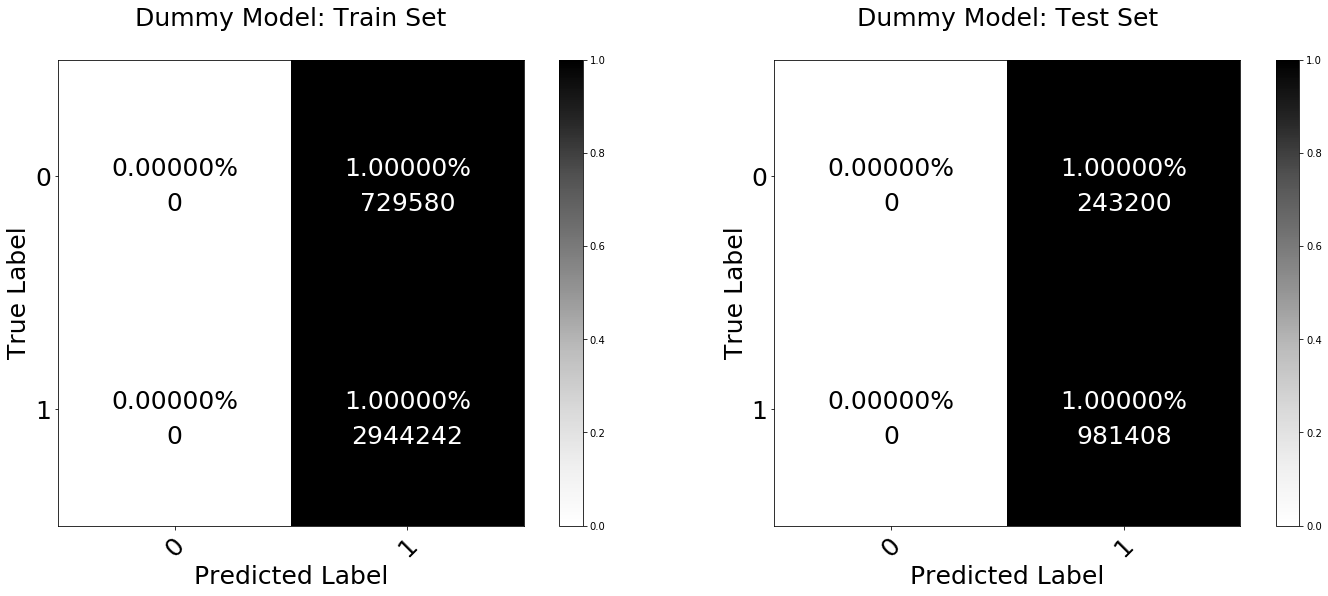

In [6]:
# Import and fit dummy model
dm_model = DummyClassifier(strategy='constant', constant=1)
dm_model.name = 'dummy_model'
dm_model.fit(train_x, train_y, sample_weight = weights)

# Plot Model Results
plot_confusion_normal(dm_model, train_x=train_x, train_y=train_y,
                     test_x=test_x ,test_y=test_y, cmap=plt.cm.Greys)

### Logistic Regression

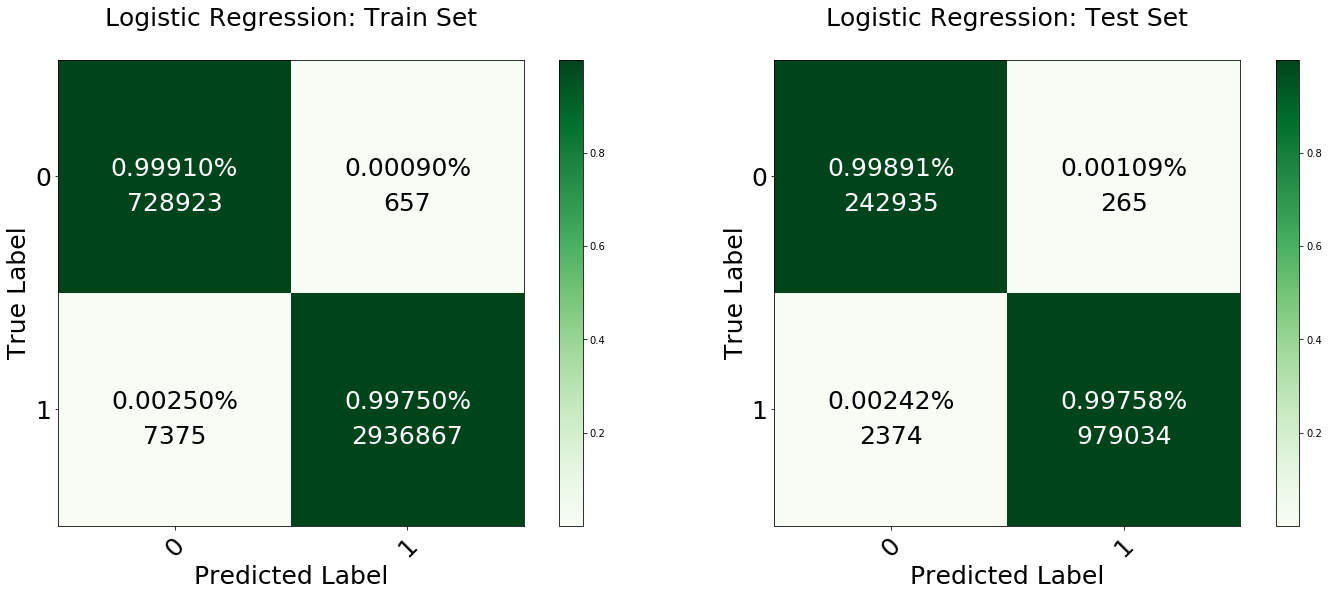

In [7]:
# Import fit logistic regression model
lr_model = LogisticRegression( random_state=7)
lr_model.name = "logistic_regression"
lr_model.fit(train_x, train_y, sample_weight = weights)

# Plot Model Reullts
plot_confusion_normal(lr_model, train_x=train_x, train_y=train_y,
                     test_x=test_x ,test_y=test_y)

Author: Kavi Sekhon